# HEART DISEASE ANALYSIS

# Contents

# 1) INTRODUCTION:

# 2) Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
heart=pd.read_csv('../input/heart.csv')

In [3]:
# To see the first top five rows in our uploaded data #
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# To see the Last five rows in our uploaded data #
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Now we will look at summary statistics of our data #
# summary statistics are used to summarize a set of observations, in order to communicate the largest amount of information as simply as possible #

heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#   To get a concise summary of the dataframe #
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
# We will list all the columns in our loaded dataset #
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# Now we will see how many rows and columns are present in our loaded dataset #
heart.shape


(303, 14)

In [9]:
# To find the how many missing values in our data #
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 3) Data Exploration

In [10]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

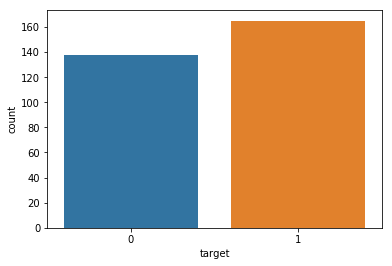

In [11]:
sns.countplot(x="target",data=heart)

In [12]:
heart.age.value_counts()[:15]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
Name: age, dtype: int64

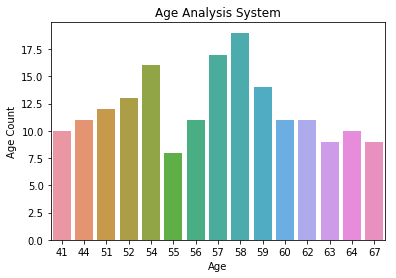

In [13]:
sns.barplot(x=heart.age.value_counts()[:15].index,y=heart.age.value_counts()[:15].values)
plt.xlabel('Age')
plt.ylabel('Age Count')
plt.title('Age Analysis System')
plt.show()

In [14]:
heart.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

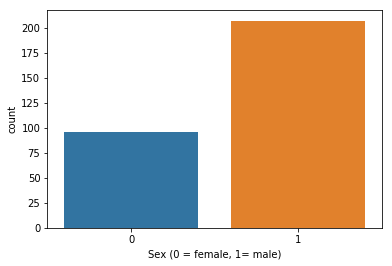

In [15]:
sns.countplot(x='sex', data=heart)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [16]:
male_disease=heart[(heart.sex==1) & (heart.target==1)]          ## Here we have sex=1(male) and target =1(have disease)
male_NO_disease=heart[(heart.sex==1) & (heart.target==0)]       ## Here we have sex=1(male) and target =0(have no disease )
print(len(male_disease),"male_disease")
print(len(male_NO_disease),"male_NO_disease")

93 male_disease
114 male_NO_disease


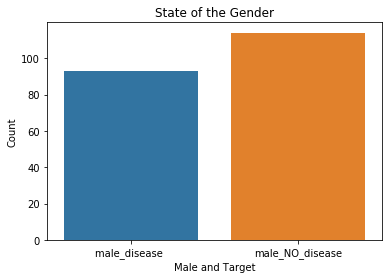

In [17]:
a=len(male_disease)
b=len(male_NO_disease)
sns.barplot(x=['male_disease ','male_NO_disease'],y=[a,b])
plt.xlabel('Male and Target')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()


In [18]:
female_disease=heart[(heart.sex==0) & (heart.target==1)]          ## Here we have sex=0(female) and target =1(have disease)
female_NO_disease=heart[(heart.sex==0) & (heart.target==0)]       ## Here we have sex=0(female) and target =0(have no disease )
print(len(female_disease),"female_disease")
print(len(female_NO_disease),"female_NO_disease")

72 female_disease
24 female_NO_disease


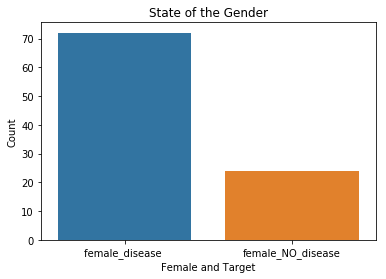

In [19]:
c=len(female_disease)
d=len(female_NO_disease)
sns.barplot(x=['female_disease ','female_NO_disease'],y=[c,d])
plt.xlabel('Female and Target')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

In [20]:
heart["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

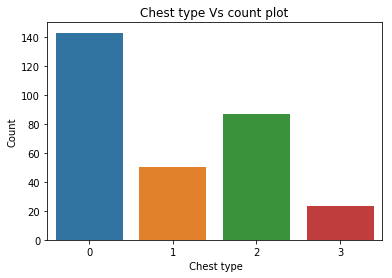

In [21]:
sns.countplot(x='cp', data=heart)
plt.xlabel(" Chest type")
plt.ylabel("Count")
plt.title("Chest type Vs count plot")
plt.show()

In [22]:
print(len(heart[(heart.cp==0)&(heart.target==0)]),"=cp_zero_target_zero")
print(len(heart[(heart.cp==0)&(heart.target==1)]),"=cp_zero_target_one")
print(len(heart[(heart.cp==1)&(heart.target==0)]),"=cp_one_target_zero")
print(len(heart[(heart.cp==1)&(heart.target==1)]),"=cp_one_target_one")

104 =cp_zero_target_zero
39 =cp_zero_target_one
9 =cp_one_target_zero
41 =cp_one_target_one


Text(0.5, 1.0, 'Chest_type_1 Vs count plot')

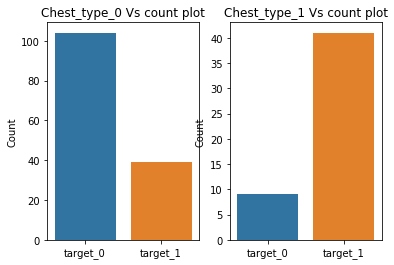

In [23]:
target_0=len(heart[(heart.cp==0)&(heart.target==0)])
target_1=len(heart[(heart.cp==0)&(heart.target==1)])
plt.subplot(1,2,1)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("Chest_type_0 Vs count plot")


target_0=len(heart[(heart.cp==1)&(heart.target==0)])
target_1=len(heart[(heart.cp==1)&(heart.target==1)])
plt.subplot(1,2, 2)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("Chest_type_1 Vs count plot")



In [24]:
print(len(heart[(heart.cp==2)&(heart.target==0)]),"=cp_two_target_zero")
print(len(heart[(heart.cp==2)&(heart.target==1)]),"=cp_two_target_one")
print(len(heart[(heart.cp==3)&(heart.target==0)]),"=cp_three_target_zero")
print(len(heart[(heart.cp==3)&(heart.target==1)]),"=cp_three_target_one")

18 =cp_two_target_zero
69 =cp_two_target_one
7 =cp_three_target_zero
16 =cp_three_target_one


Text(0.5, 1.0, 'Chest_type_3 Vs count plot')

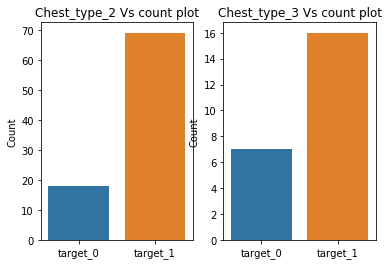

In [25]:
target_0=len(heart[(heart.cp==2)&(heart.target==0)])
target_1=len(heart[(heart.cp==2)&(heart.target==1)])
plt.subplot(1,2,1)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("Chest_type_2 Vs count plot")


target_0=len(heart[(heart.cp==3)&(heart.target==0)])
target_1=len(heart[(heart.cp==3)&(heart.target==1)])
plt.subplot(1,2, 2)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("Chest_type_3 Vs count plot")


Text(0.5, 1.0, 'Resting blood pressure')

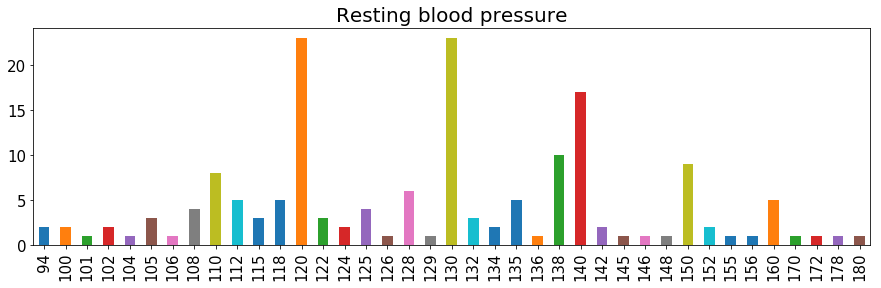

In [26]:
plot = heart[heart.target == 1].trestbps.value_counts().sort_index().plot(kind = "bar", figsize=(15,4), fontsize = 15)
plot.set_title("Resting blood pressure", fontsize = 20)

In [27]:
heart.chol.value_counts()[:20]

234    6
204    6
197    6
269    5
212    5
254    5
226    4
243    4
240    4
239    4
233    4
177    4
282    4
211    4
219    3
230    3
283    3
263    3
245    3
288    3
Name: chol, dtype: int64

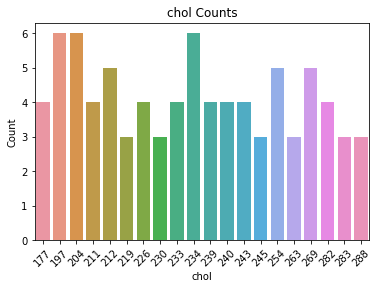

In [28]:
sns.barplot(x=heart.chol.value_counts()[:20].index,y=heart.chol.value_counts()[:20].values)
plt.xlabel('chol')
plt.ylabel('Count')
plt.title('chol Counts')
plt.xticks(rotation=45)
plt.show()

In [29]:
age_unique=sorted(heart.age.unique())
age_chol_values=heart.groupby('age')['chol'].count().values
mean_chol=[]
for i,age in enumerate(age_unique):
    mean_chol.append(sum(heart[heart['age']==age].chol)/age_chol_values[i])
    

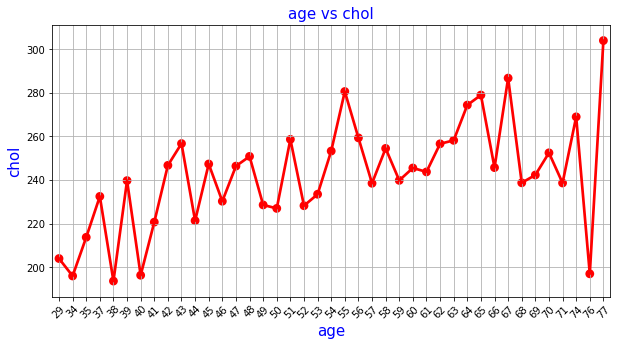

In [30]:
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_chol,color='red',alpha=0.8)
plt.xlabel('age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('chol',fontsize = 15,color='blue')
plt.title('age vs chol',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [31]:
print(len(heart[(heart.fbs==1)&(heart.target==0)]),"=fbs_one_target_zero")
print(len(heart[(heart.fbs==1)&(heart.target==1)]),"=fbs_one_target_one")

22 =fbs_one_target_zero
23 =fbs_one_target_one


Text(0.5, 1.0, 'fbs_type_1 Vs count plot')

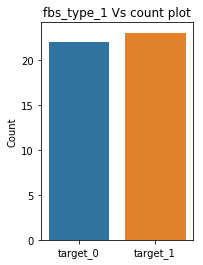

In [32]:
target_0=len(heart[(heart.fbs==1)&(heart.target==0)])
target_1=len(heart[(heart.fbs==1)&(heart.target==1)])
plt.subplot(1,2,1)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("fbs_type_1 Vs count plot")


In [33]:
print(len(heart[(heart.restecg==1)&(heart.target==0)]),"=restecg_one_target_zero")
print(len(heart[(heart.restecg==1)&(heart.target==1)]),"=restecg_one_target_one")

56 =restecg_one_target_zero
96 =restecg_one_target_one


Text(0.5, 1.0, 'thalach')

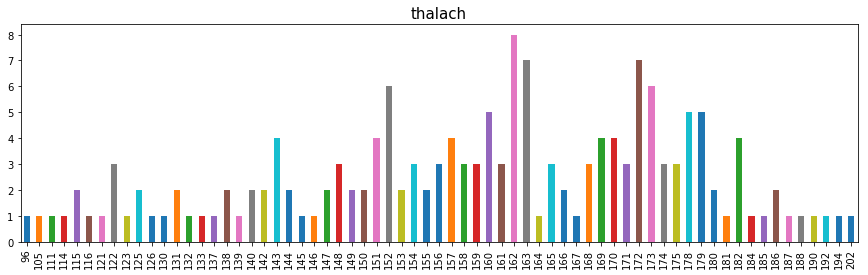

In [34]:
plot = heart[heart.target == 1].thalach.value_counts().sort_index().plot(kind = "bar", figsize=(15,4), fontsize = 10)
plot.set_title("thalach", fontsize = 15)

In [35]:
heart.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [36]:
print(len(heart[(heart.thal==3)&(heart.target==0)]),"=thal_three_target_zero")
print(len(heart[(heart.thal==3)&(heart.target==1)]),"=thal_three_target_one")

89 =thal_three_target_zero
28 =thal_three_target_one


Text(0.5, 1.0, 'thal_type_3 Vs count plot')

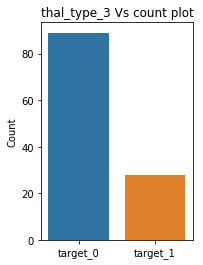

In [37]:
target_0=len(heart[(heart.thal==3)&(heart.target==0)])
target_1=len(heart[(heart.thal==3)&(heart.target==1)])
plt.subplot(1,2,1)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("thal_type_3 Vs count plot")

In [38]:
print(len(heart[(heart.thal==6)&(heart.target==0)]),"=thal_7_target_zero")   # Here thal for (6 = fixed defect) has no heart disease
print(len(heart[(heart.thal==6)&(heart.target==1)]),"=thal_7_target_one")

0 =thal_7_target_zero
0 =thal_7_target_one


In [39]:
print(len(heart[(heart.thal==7)&(heart.target==0)]),"=thal_7_target_zero")  # Here thal for (7 = reversable defect) has no heart disease
print(len(heart[(heart.thal==7)&(heart.target==1)]),"=thal_7_target_one")

0 =thal_7_target_zero
0 =thal_7_target_one


In [40]:
cp = pd.get_dummies(heart['cp'], prefix = "cp", drop_first=True)
thal = pd.get_dummies(heart['thal'], prefix = "thal" , drop_first=True)
slope = pd.get_dummies(heart['slope'], prefix = "slope", drop_first=True)

#Removing the first level.

In [41]:
data = pd.concat([heart, cp, thal, slope], axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,1,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0,0,1,0,0,1


In [42]:
data.drop(['cp', 'thal', 'slope'], axis=1, inplace=True)
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


In [43]:
x = data.drop(['target'], axis=1)
y = data.target

In [44]:
print(x.shape)

(303, 18)


In [45]:
x.corr()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,0.276326,-0.147399,-0.059432,0.047516,0.063758,-0.135891,0.110752,0.177201,-0.192580
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,0.118261,-0.041249,-0.116588,0.088043,0.141135,-0.376365,0.321559,-0.009157,-0.014356
trestbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,0.101389,-0.081851,-0.045107,0.151343,0.076369,-0.140712,0.109573,0.025207,-0.087472
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,0.070511,-0.012750,-0.037918,-0.050589,-0.093560,-0.004591,0.059621,0.051177,-0.028054
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,0.137979,-0.060649,0.083679,0.055511,0.091351,-0.086774,0.030953,-0.033360,-0.020255
restecg,-0.116211,-0.058196,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,-0.072042,0.077859,0.084196,-0.074654,-0.013429,0.029597,-0.023012,-0.087349,0.100989
thalach,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,-0.213177,0.248317,0.165475,0.079082,-0.159748,0.294801,-0.215417,-0.419627,0.448043
exang,0.096801,0.141664,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,0.115739,-0.233863,-0.271028,-0.093384,0.063073,-0.328539,0.300223,0.257687,-0.287606
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,0.222682,-0.277513,-0.132444,0.086959,0.104635,-0.339086,0.302145,0.310986,-0.511356
ca,0.276326,0.118261,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,0.222682,1.000000,-0.134715,-0.088998,-0.070496,0.066618,-0.221331,0.203601,0.141923,-0.120306


In [46]:
x = (x - x.min())/(x.max()-x.min())
x.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# 4) Creating model

# LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(x_train, y_train)
logi.score(x_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9016393442622951

In [49]:
from sklearn.model_selection import GridSearchCV
 ## Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logi_model = GridSearchCV(logi,param_grid=params,cv=10)

In [50]:
logi_model.fit(x_train,y_train)
logi_model.best_params_

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [51]:
logi = LogisticRegression(C=1, penalty='l2')
logi.fit(x_train, y_train)
logi.score(x_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9016393442622951

# 5) Explanation

[]

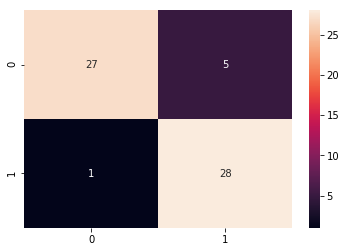

In [52]:
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test, logi.predict(x_test))
sns.heatmap(cm_lg, annot=True)
plt.plot()

# DECISION TREE

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)                                # HERE WE ARE FITTING THE VALUES OF BOTH x_train,y_train

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
predict=dtree.predict(x_test)                               # HERE WE ARE PREDICTING y_test values.
predict

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

   micro avg       0.80      0.80      0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



[]

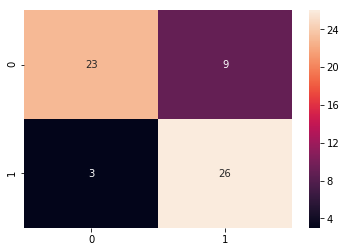

In [55]:
#NOW WE WILL SEE CONFUSION MATRIX FOR DECISION TREE

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predict))


from sklearn.metrics import confusion_matrix
cm_tree = confusion_matrix(y_test,predict )
sns.heatmap(cm_tree, annot=True)
plt.plot()

In [56]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,predict)*100)    #HERE WE ARE GETTING OUR ACCURACY OF OUR MODEL

Accuracy is: 80.32786885245902


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
rfc_predict=rfc.predict(x_test)                                # HERE WE ARE PREDICTING y_test values.
rfc_predict

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



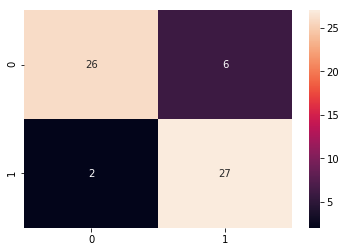

In [59]:
#NOW WE WILL SEE CONFUSION MATRIX FOR RANDOM FOREST

from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test,rfc_predict )
sns.heatmap(cm_rf, annot=True)
plt.plot()


print(classification_report(y_test,rfc_predict))

In [60]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,rfc_predict)*100)    #HERE WE ARE GETTING OUR ACCURACY OF OUR MODEL

Accuracy is: 86.88524590163934


# K Nearest Neighbors

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
Classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
Classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
y_predict=Classifier.predict(x_test)                                # HERE WE ARE PREDICTING y_test values.                
y_predict

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

[]

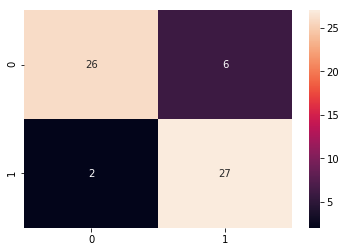

In [64]:
#NOW WE WILL SEE CONFUSION MATRIX FOR K NEAREST NEIGHBOR

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_predict )
sns.heatmap(cm_knn, annot=True)
plt.plot()

In [65]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_predict)*100)    #HERE WE ARE GETTING OUR ACCURACY OF OUR MODEL

Accuracy is: 86.88524590163934


# Confusion Matrixes

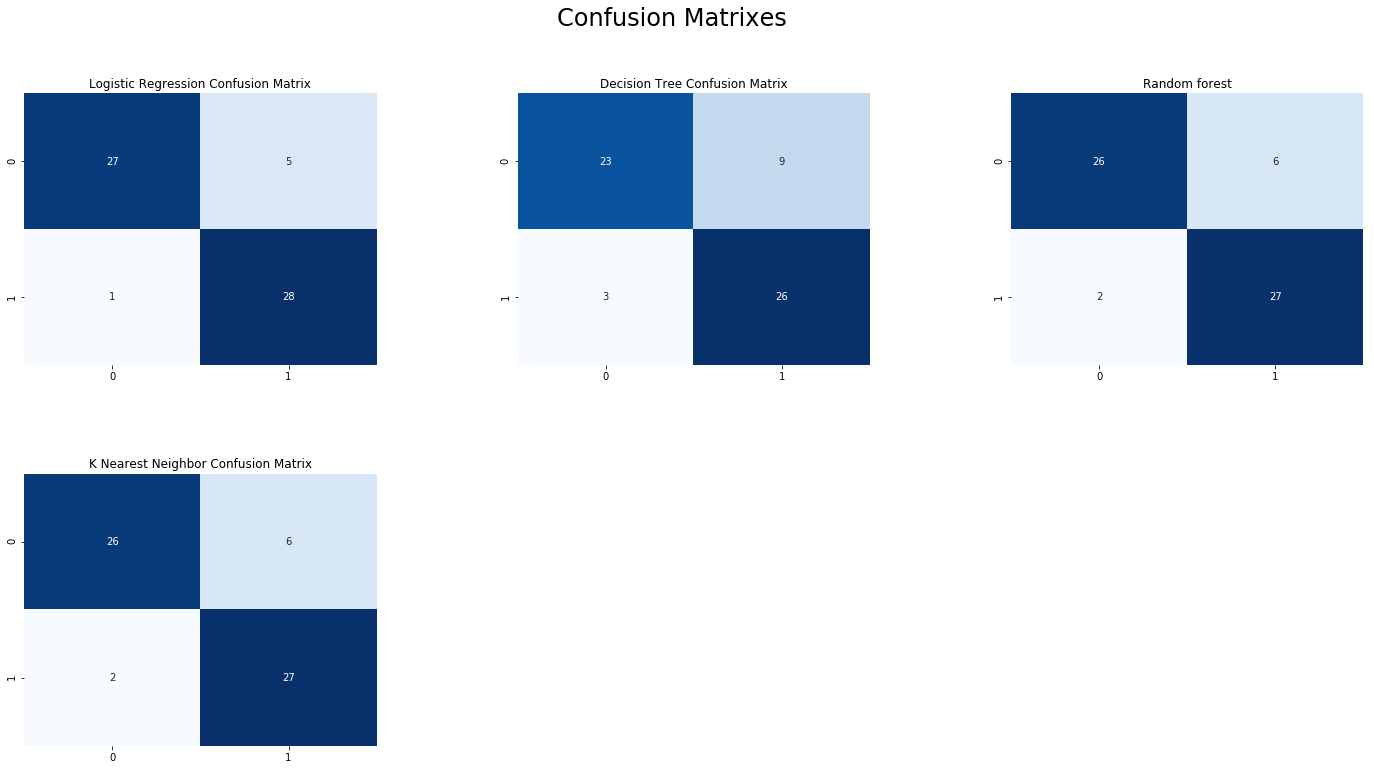

In [66]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lg,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_tree,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Random forest")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("K Nearest Neighbor Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)
